In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


df = pd.read_csv(
    "AirQualityUCI.csv",
    sep=";",       
    decimal=",",
)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,",,,,,"
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,","
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [3]:
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])
df = df.drop(columns=["Date", "Time"])


In [4]:
df.fillna(0, inplace=True)
df.replace(-200, np.nan, inplace=True)
print("Missing values replaced with 0")

Missing values replaced with 0


In [5]:
df.drop_duplicates(inplace=True)
print("Duplicates removed")
print("New Shape:", df.shape)

Duplicates removed
New Shape: (9327, 13)


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 0 to 9357
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         828 non-null    float64
 1   PT08.S1(CO)    828 non-null    float64
 2   NMHC(GT)       828 non-null    float64
 3   C6H6(GT)       828 non-null    float64
 4   PT08.S2(NMHC)  828 non-null    float64
 5   NOx(GT)        828 non-null    float64
 6   PT08.S3(NOx)   828 non-null    float64
 7   NO2(GT)        828 non-null    float64
 8   PT08.S4(NO2)   828 non-null    float64
 9   PT08.S5(O3)    828 non-null    float64
 10  T              828 non-null    float64
 11  RH             828 non-null    float64
 12  AH             828 non-null    float64
dtypes: float64(13)
memory usage: 90.6 KB


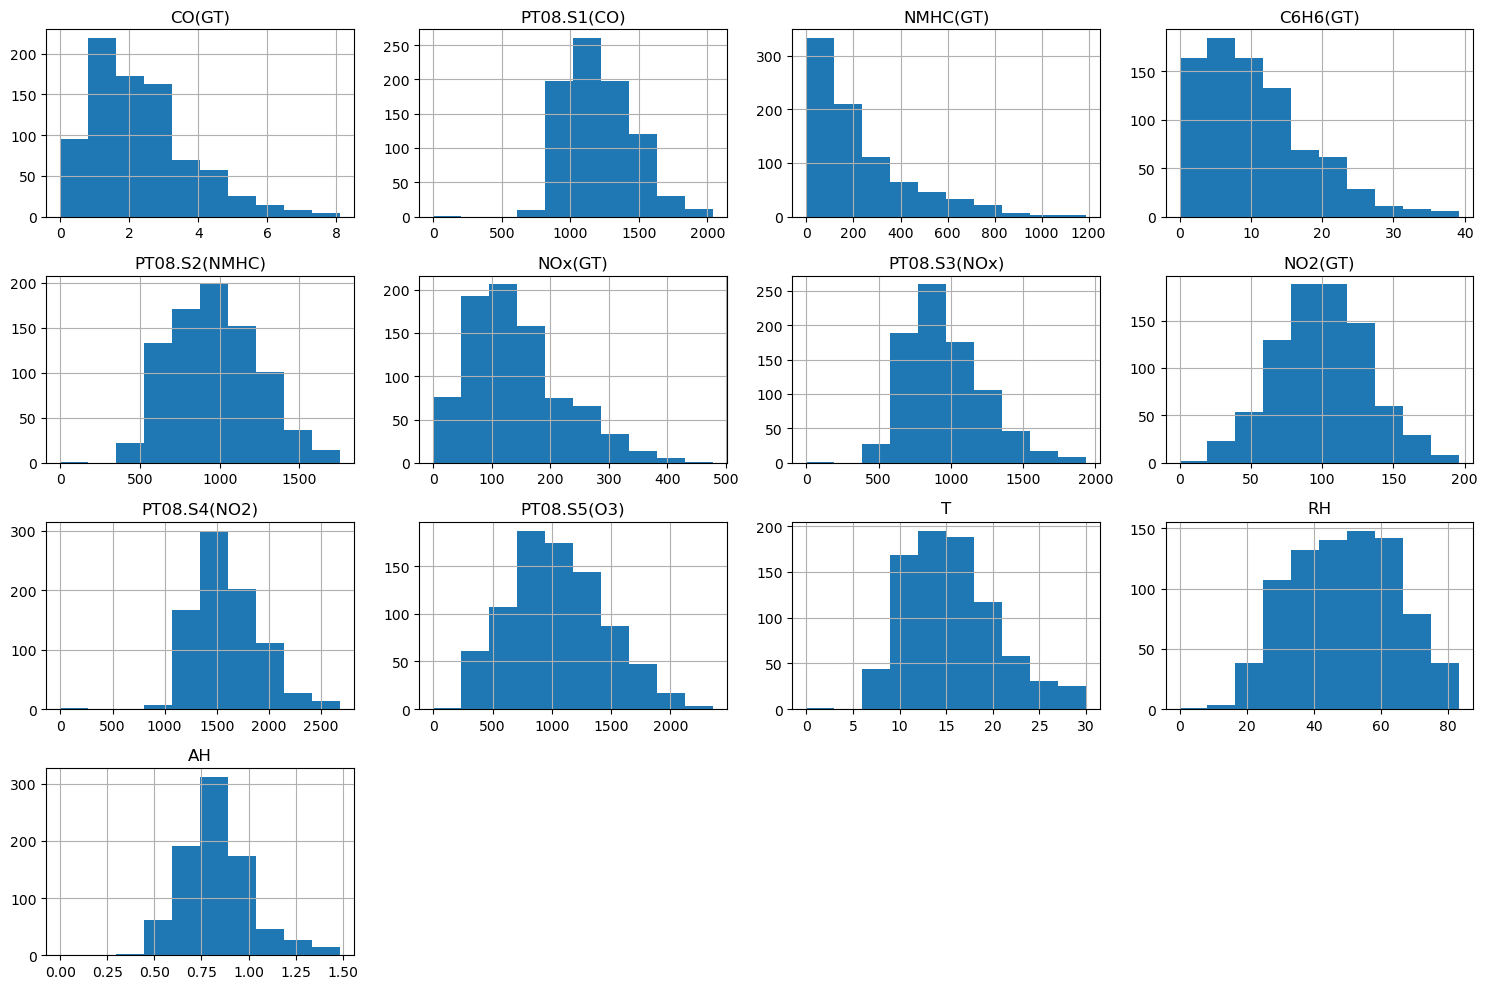

In [7]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

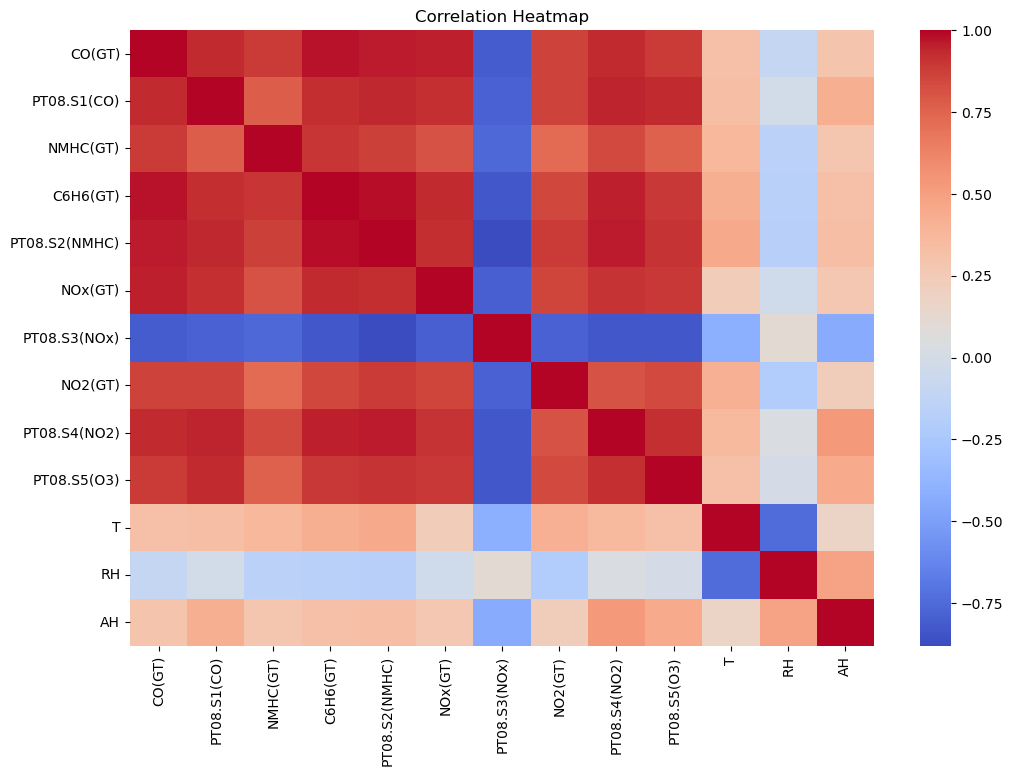

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = df.drop(columns=["CO(GT)"])
y = df["CO(GT)"]
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (828, 12)
y Shape: (828,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)


SVR()

In [12]:
y_pred = svr.predict(X_test)

print("SVR R2:", r2_score(y_test, y_pred))
print("SVR RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("SVR MAE:", mean_absolute_error(y_test, y_pred))


SVR R2: 0.9689113901073405
SVR RMSE: 0.2597038362273237
SVR MAE: 0.1633399935759675


C:\Users\paude\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
